# Для функции f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30
---
Найти:

1. Определить корни

2. Найти интервалы, на которых функция возрастает

3. Найти интервалы, на которых функция убывает

4. Построить график

5. Вычислить вершину

6. Определить промежутки, на котором f > 0

7. Определить промежутки, на котором f < 0

*Численное решение с использованием библиотеки <b>SciPy</b>*

In [57]:
from sympy import plot, sin, cos, lambdify, diff, evalf
from scipy import optimize
from sympy.abc import x

### Построим график функции

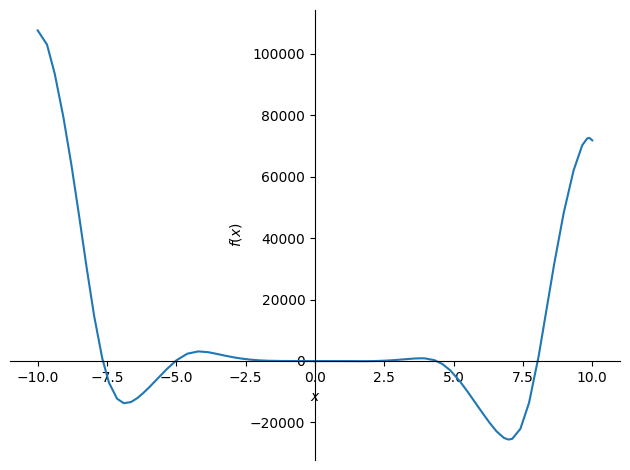

In [13]:
my_fun = -12 * x**4 * sin(cos(x)) - 18 * x**3 + 5 * x**2 + 10 * x - 30
plot(my_fun, show=False).show()

### Найдём нули функции

In [35]:
# преобразование функции 
func_np = lambdify(x, '-12*x**4*sin(cos(x)) - 18*x**3+5*x**2 + 10*x - 30', modules=['numpy'])

In [29]:
# поиск корней
zeros = []
solution = optimize.fsolve(func_np, -8)
zeros.append(solution[0])
solution = optimize.fsolve(func_np, -5)
zeros.append(solution[0])
solution = optimize.fsolve(func_np, 5)
zeros.append(solution[0])
solution = optimize.fsolve(func_np, 7.5)
zeros.append(solution[0])
solution = optimize.fsolve(func_np, [-2.5, 2.5])
zeros.append(solution[0])
zeros.sort()
for i in zeros:
    print(i)


-7.650622285132756
-5.026865928206214
-1.3389666392771225
4.38352369796896
8.035164133413524


### Производная

In [89]:
fun_diff = diff(-12 * x**4 * sin(cos(x)) - 18 * x**3 + 5 * x**2 + 10 * x - 30)
fun_diff

12*x**4*sin(x)*cos(cos(x)) - 48*x**3*sin(cos(x)) - 54*x**2 + 10*x + 10

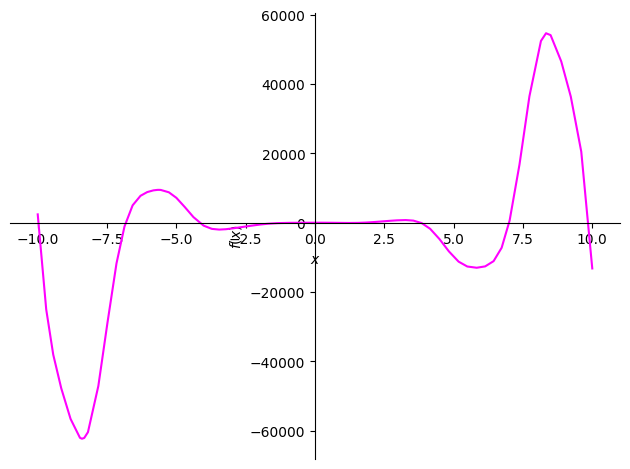

In [90]:
# график производной
plot(fun_diff, show=False, line_color='magenta').show()

### Вершины функции

In [91]:
fun_extrem = lambdify(x, fun_diff, modules=['numpy'])
extr = []
solution = optimize.fsolve(fun_extrem, -10)
extr.append(solution[0])
solution = optimize.fsolve(fun_extrem, -7.5)
extr.append(solution[0])
solution = optimize.fsolve(fun_extrem, -5)
extr.append(solution[0])
solution = optimize.fsolve(fun_extrem, -2.5)
extr.append(solution[0])
solution = optimize.fsolve(fun_extrem, 7.5)
extr.append(solution[0])
solution = optimize.fsolve(fun_extrem, 5)
extr.append(solution[0])
solution = optimize.fsolve(fun_extrem, 10)
extr.append(solution[0])
extr.sort()
for i in extr:
    print(i)

-9.9789537610151
-6.831370040000853
-4.167783523850484
-0.3926771799327562
3.8193108333822843
7.001031658541252
9.877149053972511


### Промежутки возрастания и убывания функции (f'(x) > 0 и f'(x) < 0)

In [101]:
# есть сомнение в результатах вычисления fun.evalf
def up_doun(fun,rts):
    gaps = []
    for i in range(len(rts) - 1):
        sol = fun.evalf(subs={x:rts[i+1] - rts[i]})        
        if sol > 0:
            gaps.append(f'({rts[i]},{rts[i+1]}) - возрастание')
        else:
            gaps.append(f'({rts[i]},{rts[i+1]}) - убывание')
    
    if 'возрастание' in gaps[0]:
        gaps.insert(0, f'(-бесконечность, {rts[0]}) - убывание')
    else:
        gaps.insert(0, f'(-бесконечность, {rts[0]}) - возрастание')
    len_rts = len(rts) - 1
    if 'возрастание' in gaps[len(gaps) - 1]:
        gaps.append(f'({rts[len_rts]}, +бесконечность) - убывание')
    else:
        gaps.append(f'({rts[len_rts]}, +бесконечность) - возрастание')        
    return gaps

mon_gaps = up_doun(fun_diff, extr)

for i in mon_gaps:
    print(i)

(-бесконечность, -9.9789537610151) - убывание
(-9.9789537610151,-6.831370040000853) - возрастание
(-6.831370040000853,-4.167783523850484) - возрастание
(-4.167783523850484,-0.3926771799327562) - возрастание
(-0.3926771799327562,3.8193108333822843) - убывание
(3.8193108333822843,7.001031658541252) - возрастание
(7.001031658541252,9.877149053972511) - возрастание
(9.877149053972511, +бесконечность) - убывание


### Промежутки, где значения функции имеют положительные или отрицательные значения

In [100]:
# есть сомнение в результатах вычисления fun.evalf
def pozit_negat(fun,rts):
    gaps = []
    for i in range(len(rts) - 1):
        x_izm = (rts[i+1] - rts[i])/2
        sol = fun.evalf(subs={x:x_izm}) 
        print(f'Для x={x_izm} f(x)={sol}')       
        if sol > 0:
            gaps.append(f'({rts[i]},{rts[i+1]}) - больше нуля')
        else:
            gaps.append(f'({rts[i]},{rts[i+1]}) - меньше нуля')
    
    if 'больше нуля' in gaps[0]:
        gaps.insert(0, f'(-бесконечность, {rts[0]}) - меньше нуля')
    else:
        gaps.insert(0, f'(-бесконечность, {rts[0]}) - больше нуля')
    len_rts = len(rts) - 1
    if 'больше нуля' in gaps[len(gaps) - 1]:
        gaps.append(f'({rts[len_rts]}, +бесконечность) - меньше нуля')
    else:
        gaps.append(f'({rts[len_rts]}, +бесконечность) - больше нуля')        
    return gaps

print(zeros)
pn_gaps = pozit_negat(my_fun, zeros)

for i in pn_gaps:
    print(i)

[-7.650622285132756, -5.026865928206214, -1.3389666392771225, 4.38352369796896, 8.035164133413524]
Для x=1.311878178463271 f(x)=-57.9172067067852
Для x=1.8439496444645458 f(x)=-70.4410654225885
Для x=2.861245168623041 f(x)=277.202942069874
Для x=1.8258202177222818 f(x)=-71.3464268507684
(-бесконечность, -7.650622285132756) - больше нуля
(-7.650622285132756,-5.026865928206214) - меньше нуля
(-5.026865928206214,-1.3389666392771225) - меньше нуля
(-1.3389666392771225,4.38352369796896) - больше нуля
(4.38352369796896,8.035164133413524) - меньше нуля
(8.035164133413524, +бесконечность) - больше нуля
